# Network visualisations of three CrowdTangle lists/groups in Gephi

In this notebook, we use CrowdTangle Facebook data to create and analyse the networks of three lists of actors. The workflow uses [NetworkX python library](https://networkx.org). 

Networks are usually described by two sets of items, which ultimately "form" a network: `Nodes` and `Edges`. In mathematical terms, this is known as a `Graph`. Nodes and edges can have metadata associated with them (picture courtesy: T. McKinney). 

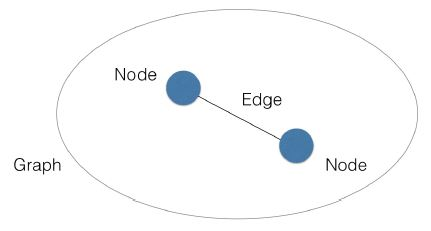


For basic introduction to network analysis, please see [DataCamp's GitHub page](https://github.com/trenton3983/DataCamp/blob/master/2020-05-21_intro_to_network_analysis_in_python.ipynb). You can also check out Trenton McKinney's Notebook [here](https://trenton3983.github.io/files/projects/2020-05-21_intro_to_network_analysis_in_python/2020-05-21_intro_to_network_analysis_in_python.html).

## Section A. Installations and imports
---



In this section, we install and import necessary python packagaes

### Install and import packages

In [1]:
!pip install nxviz

     |████████████████████████████████| 11.2 MB 8.0 MB/s 
     |████████████████████████████████| 930 kB 44.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
!pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 5.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nxviz 0.7.4 requires matplotlib>=3.3.3, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
from pathlib import Path
import requests
import networkx as nx
import nxviz as nv
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, date
from pprint import pprint as pp
from itertools import combinations
import random
from collections import Counter, defaultdict
import numpy as np
import statistics as stats
import operator

/usr/local/lib/python3.7/dist-packages/nxviz/__init__.py:29: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  """


In [2]:
print(f'NetworkX version: {nx.__version__}')
print(f'Matplotlib version: {mpl.__version__}')

NetworkX version: 2.6.3
Matplotlib version: 3.1.3


## Section B. Load the dataset and pre-process the data
---


Below we load the csv dataset downloaded from CrowdTangle (as pandas dataframe), and do data pre-processings. In the `PATH_TO_YOUR_DIRECTORY` string insert the path to your Google Drive folder where your csv dataset is located.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir("/content/drive/MyDrive/YOUR_PATH_HERE")

In [5]:
import pandas as pd
import time

Below we load the csv datasets as pandas dataframe.

In [6]:
# load csv data as pandas dataframe
csv_data_p = pd.read_csv("file1.csv", low_memory=False,  lineterminator='\n', sep=';', error_bad_lines=False)

csv_data_n = pd.read_csv("file2.csv", low_memory=False,  lineterminator='\n', sep=';', error_bad_lines=False)

csv_data_s = pd.read_csv("file3.csv", low_memory=False,  lineterminator='\n', sep=';', error_bad_lines=False)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Let us now enquire the shape of the dataset and print available columns to the dataset

In [7]:
print (csv_data_p.shape)
print (csv_data_n.shape)
print (csv_data_s.shape)

(70886, 40)
(6679, 40)
(16343, 40)


In [8]:
csv_data_p.columns

Index(['account.name', 'account.handle', 'platformId', 'Page Category',
       'Page Admin Top Country', 'Page Description', 'Page Created',
       'subscriberCount', 'Followers at Posting', 'date', 'Post Created Date',
       'Post Created Time', 'type', 'totalInteraction',
       'statistics.actual.likeCount', 'statistics.actual.commentCount',
       'statistics.actual.shareCount', 'statistics.actual.loveCount',
       'statistics.actual.wowCount', 'statistics.actual.hahaCount',
       'statistics.actual.sadCount', 'statistics.actual.angryCount',
       'statistics.actual.careCount', 'Video Share Status', 'Is Video Owner?',
       'statistics.actual.videoPostViewCount',
       'statistics.actual.videoTotalViewCount',
       'statistics.actual.videoAllCrosspostsViewCount', 'Video Length',
       'postUrl', 'message', 'expandedLinks.original',
       'expandedLinks.expanded', 'imageText', 'title', 'description',
       'brandedContentSponsor.platformId', 'brandedContentSponsor.name',
 

In [9]:
# show the csv data set
display(csv_data_p)

,account.name,account.handle,platformId,Page Category,Page Admin Top Country,Page Description,Page Created,subscriberCount,Followers at Posting,date,...,message,expandedLinks.original,expandedLinks.expanded,imageText,title,description,brandedContentSponsor.platformId,brandedContentSponsor.name,brandedContentSponsor.category,score
0,पुष्पेंद्र कुलश्रेष्ठ हिन्दू योद्धा,PushpendraKulshresht,111429147220605,GAMING_VIDEO_CREATOR,IN,Gaming video creator,2020-04-30 18:00:43,15643.0,89269.0,2022-04-11 10:32:58 CEST,...,🙏🌹🚩#जयश्रीराम🚩🌹🙏,https://www.facebook.com/287150574699511/photo...,NaN,"भाई चारे की बात करने वाले हिंदुओ ।देखो ""आज देश...",देशभक्त,#हिन्दूएकता ✊️🙏🌹🚩#जयश्रीराम🚩🌹🙏\n#लाइक & #शेयर 🙏,NaN,NaN,NaN,-8.67
1,Pushpendra Kulshresth Fans,PushpendraKulshresth,112670183467892,MEDIA,IN,पूरी दुनिया के आगे सिर्फ सच्चाई को बताना और लो...,2019-09-27 09:14:14,58769.0,86404.0,2022-04-11 10:26:56 CEST,...,▪️विश्व विजयी भारतीय संस्कृति🚩 _______________...,https://www.facebook.com/PushpendraKulshresth/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.56
2,पुष्पेन्द्रफैंस,puspendrafans,105424034616839,TOPIC_JUST_FOR_FUN,IN,पेज में wehindu00 पुष्पेन्द्र जी का प्रसंसक ...,2020-08-21 03:58:49,3717.0,3841.0,2022-04-11 10:20:36 CEST,...,Manoj Muntashir ने बताया इतिहास कहा जब देश में...,https://www.facebook.com/puspendrafans/videos/...,NaN,NaN,Manoj Muntashir ने बताया इतिहास कहा जब देश में...,NaN,NaN,NaN,NaN,-1.62
3,पुष्पेंद्र कुलश्रेष्ठ फैंस क्लब,Pushpendrarss2,113214903796196,COMMUNITY,IN,"पेज से जुड़ने के लिए आपका धन्यवाद, आशा करते है ...",2020-07-13 06:39:03,59492.0,92711.0,2022-04-11 10:02:55 CEST,...,शत्रुघ्न सिन्हा ने अमिताभ बच्चन से दोस्ती में ...,https://sachkhabar.co.in/shatrughan-sinha-had-...,NaN,NaN,शत्रुघ्न सिन्हा ने अमिताभ बच्चन से दोस्ती में ...,बॉलीवुड के जाने-माने सितारे और शत्रुघ्न सिन्हा...,NaN,NaN,NaN,-0.83
4,Pushpendra Kulshrestha Fans Club,Pushpendrarss,313739616231431,ACTIVITY_GENERAL,IN,"पेज से जुड़ने के लिए आपका धन्यवाद, आशा करते है ...",2019-06-07 08:59:33,445933.0,853709.0,2022-04-11 09:55:51 CEST,...,जब तारक मेहता की बबीता जी ने सालों पुराना दर्द...,https://appearnews.com/when-taarak-mehtas-babi...,NaN,NaN,जब तारक मेहता की बबीता जी ने सालों पुराना दर्द...,तारक मेहता का उल्टा चश्मा (Taarak Mehta Ka Ool...,NaN,NaN,NaN,-2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70881,Pushpendra Kulshrestha Support Team,PushpendraKulshrestha21,1888295888151386,COMMUNITY,IN,india में सबसे popular वक्ता आदरणीय pushpendra...,2017-11-10 15:36:11,NaN,NaN,2017-11-17 14:53:54 CET,...,गुजरात चुनाव के लिए BJP Gujarat के उम्मीदवारों...,https://www.facebook.com/PushpendraKulshrestha...,NaN,NaN,Photos from Pushpendra Kulshrestha Support Tea...,NaN,NaN,NaN,NaN,-60
70882,Pushpendra Kulshrestha Support Team,PushpendraKulshrestha21,1888295888151386,COMMUNITY,IN,india में सबसे popular वक्ता आदरणीय pushpendra...,2017-11-10 15:36:11,NaN,NaN,2017-11-16 18:59:34 CET,...,NaN,https://www.facebook.com/PushpendraKulshrestha...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-60
70883,Pushpendra Kulshrestha Support Team,PushpendraKulshrestha21,1888295888151386,COMMUNITY,IN,india में सबसे popular वक्ता आदरणीय pushpendra...,2017-11-10 15:36:11,NaN,NaN,2017-11-12 17:30:32 CET,...,Narendra Modi के प्रधानमन्त्री बनने से पहले क्...,https://www.facebook.com/PushpendraKulshrestha...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.74
70884,Pushpendra Kulshrestha Support Team,PushpendraKulshrestha21,1888295888151386,COMMUNITY,IN,india में सबसे popular वक्ता आदरणीय pushpendra...,2017-11-10 15:36:11,NaN,NaN,2017-11-11 14:57:50 CET,...,जिस अमेरिका ने Narendra Modi को वीज़ा देने से म...,https://www.facebook.com/PushpendraKulshrestha...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-13.5


### Change the individual `account names` to the `group names`



> (**OPTIONAL**: do this only if you want to visualise the connections between the groups - will lose the granularity of the actor names)









In [ ]:
csv_data_p ['account.name'] = 'Pushpendra Group'
csv_data_n ['account.name'] = 'Narsinganand Group'
csv_data_s ['account.name'] = 'Suresh Chavanke Group'

In [ ]:
# show the csv data set
display(csv_data_s)

### Concatenate three pandas dataframes into one dataframe

In [10]:
csv_data = pd.concat([csv_data_p, csv_data_n, csv_data_s], axis=0)

In [11]:
print (csv_data.shape)

(93908, 40)


In [12]:
display (csv_data)

,account.name,account.handle,platformId,Page Category,Page Admin Top Country,Page Description,Page Created,subscriberCount,Followers at Posting,date,...,message,expandedLinks.original,expandedLinks.expanded,imageText,title,description,brandedContentSponsor.platformId,brandedContentSponsor.name,brandedContentSponsor.category,score
0,पुष्पेंद्र कुलश्रेष्ठ हिन्दू योद्धा,PushpendraKulshresht,111429147220605,GAMING_VIDEO_CREATOR,IN,Gaming video creator,2020-04-30 18:00:43,15643.0,89269.0,2022-04-11 10:32:58 CEST,...,🙏🌹🚩#जयश्रीराम🚩🌹🙏,https://www.facebook.com/287150574699511/photo...,NaN,"भाई चारे की बात करने वाले हिंदुओ ।देखो ""आज देश...",देशभक्त,#हिन्दूएकता ✊️🙏🌹🚩#जयश्रीराम🚩🌹🙏\n#लाइक & #शेयर 🙏,NaN,NaN,NaN,-8.67
1,Pushpendra Kulshresth Fans,PushpendraKulshresth,112670183467892,MEDIA,IN,पूरी दुनिया के आगे सिर्फ सच्चाई को बताना और लो...,2019-09-27 09:14:14,58769.0,86404.0,2022-04-11 10:26:56 CEST,...,▪️विश्व विजयी भारतीय संस्कृति🚩 _______________...,https://www.facebook.com/PushpendraKulshresth/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.56
2,पुष्पेन्द्रफैंस,puspendrafans,105424034616839,TOPIC_JUST_FOR_FUN,IN,पेज में wehindu00 पुष्पेन्द्र जी का प्रसंसक ...,2020-08-21 03:58:49,3717.0,3841.0,2022-04-11 10:20:36 CEST,...,Manoj Muntashir ने बताया इतिहास कहा जब देश में...,https://www.facebook.com/puspendrafans/videos/...,NaN,NaN,Manoj Muntashir ने बताया इतिहास कहा जब देश में...,NaN,NaN,NaN,NaN,-1.62
3,पुष्पेंद्र कुलश्रेष्ठ फैंस क्लब,Pushpendrarss2,113214903796196,COMMUNITY,IN,"पेज से जुड़ने के लिए आपका धन्यवाद, आशा करते है ...",2020-07-13 06:39:03,59492.0,92711.0,2022-04-11 10:02:55 CEST,...,शत्रुघ्न सिन्हा ने अमिताभ बच्चन से दोस्ती में ...,https://sachkhabar.co.in/shatrughan-sinha-had-...,NaN,NaN,शत्रुघ्न सिन्हा ने अमिताभ बच्चन से दोस्ती में ...,बॉलीवुड के जाने-माने सितारे और शत्रुघ्न सिन्हा...,NaN,NaN,NaN,-0.83
4,Pushpendra Kulshrestha Fans Club,Pushpendrarss,313739616231431,ACTIVITY_GENERAL,IN,"पेज से जुड़ने के लिए आपका धन्यवाद, आशा करते है ...",2019-06-07 08:59:33,445933.0,853709.0,2022-04-11 09:55:51 CEST,...,जब तारक मेहता की बबीता जी ने सालों पुराना दर्द...,https://appearnews.com/when-taarak-mehtas-babi...,NaN,NaN,जब तारक मेहता की बबीता जी ने सालों पुराना दर्द...,तारक मेहता का उल्टा चश्मा (Taarak Mehta Ka Ool...,NaN,NaN,NaN,-2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16338,Sudarshan News Behror,SudarshanNewsBehror,331024313693421,TV_CHANNEL,IN,"एक चैनल जिस मे है हिम्मत सच कहने की, सिर्फ चैन...",2013-05-20 12:38:01,NaN,NaN,2017-04-28 03:55:13 CEST,...,ॐ सर्वे भवन्तु सुखिनः सर्वे सन्तु निरामयाः । स...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.2
16339,Sudarshan News Behror,SudarshanNewsBehror,331024313693421,TV_CHANNEL,IN,"एक चैनल जिस मे है हिम्मत सच कहने की, सिर्फ चैन...",2013-05-20 12:38:01,NaN,NaN,2017-04-27 09:28:26 CEST,...,फ़िल्म स्टार विनोद खन्ना नहीं रहे # 70 वर्ष की ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.5
16340,Sudarshan News Behror,SudarshanNewsBehror,331024313693421,TV_CHANNEL,IN,"एक चैनल जिस मे है हिम्मत सच कहने की, सिर्फ चैन...",2013-05-20 12:38:01,NaN,NaN,2017-04-25 11:27:32 CEST,...,‪#SadhviPragya जी के बेल के साथ ही @SudarshanN...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7
16341,Sudarshan News Behror,SudarshanNewsBehror,331024313693421,TV_CHANNEL,IN,"एक चैनल जिस मे है हिम्मत सच कहने की, सिर्फ चैन...",2013-05-20 12:38:01,NaN,NaN,2017-04-25 07:11:28 CEST,...,राजस्थान में जन्में और सुकमा में शहीद हुए श्री...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.5


## Section C. Computation of the nodes and edges for Gephi visualisation
---

In this section we compute the nodes and edges of the whole graph, and by using the `NetworkX` python package, create the graph. 

It is possible to choose any `source` and `target` field as one wishes. Some possible examples are:



> `source`: account.name, `target`: explandedLinks => shows the mapping of accounts and shared links.

> `source`: account.name, `target`: category => shows what account falls in which category.

> `source`: account.name, `target`: type => shows which account shares what types of posts the most, e.g., Videos, Photos etc.

The `nodes.csv` and `edges.csv` files created below can be imported to visualisation softwares like Gephi to make interactive visualisations. 

### Compute the graph edges and nodes

In [24]:
nodelist = pd.DataFrame({'accountname':csv_data ['account.name'], 'link':csv_data ['expandedLinks.original']})

> Nodes must have the map: `Id`, `Label`

In [32]:
nodes = pd.DataFrame({'Id':nodelist.iloc[:,0], 'Label':nodelist.iloc[:,0]})

> Edges must have the map: `Source`, `Target`

In [31]:
edges = pd.DataFrame({'Source':nodelist.iloc[:,0], 'Target':nodelist.iloc[:,1]})

In [ ]:
print (edges.shape)

(93908, 2)


In [35]:
print (nodes)

                                        Id  \
0      पुष्पेंद्र कुलश्रेष्ठ हिन्दू योद्धा   
1               Pushpendra Kulshresth Fans   
2                          पुष्पेन्द्रफैंस   
3          पुष्पेंद्र कुलश्रेष्ठ फैंस क्लब   
4         Pushpendra Kulshrestha Fans Club   
...                                    ...   
16338                Sudarshan News Behror   
16339                Sudarshan News Behror   
16340                Sudarshan News Behror   
16341                Sudarshan News Behror   
16342                Sudarshan News Behror   

                                     Label  
0      पुष्पेंद्र कुलश्रेष्ठ हिन्दू योद्धा  
1               Pushpendra Kulshresth Fans  
2                          पुष्पेन्द्रफैंस  
3          पुष्पेंद्र कुलश्रेष्ठ फैंस क्लब  
4         Pushpendra Kulshrestha Fans Club  
...                                    ...  
16338                Sudarshan News Behror  
16339                Sudarshan News Behror  
16340                Sudarshan News Behror

In [40]:
print (edges)

                                    Source  \
0      पुष्पेंद्र कुलश्रेष्ठ हिन्दू योद्धा   
1               Pushpendra Kulshresth Fans   
2                          पुष्पेन्द्रफैंस   
3          पुष्पेंद्र कुलश्रेष्ठ फैंस क्लब   
4         Pushpendra Kulshrestha Fans Club   
...                                    ...   
16338                Sudarshan News Behror   
16339                Sudarshan News Behror   
16340                Sudarshan News Behror   
16341                Sudarshan News Behror   
16342                Sudarshan News Behror   

                                                  Target  
0      https://www.facebook.com/287150574699511/photo...  
1      https://www.facebook.com/PushpendraKulshresth/...  
2      https://www.facebook.com/puspendrafans/videos/...  
3      https://sachkhabar.co.in/shatrughan-sinha-had-...  
4      https://appearnews.com/when-taarak-mehtas-babi...  
...                                                  ...  
16338                             

### Save the edges and nodes to csv

In [33]:
edges.to_csv('edges.csv',index=False) # save the edges into csv 

In [34]:
nodes.to_csv('nodes.csv',index=False) # save the nodes into csv 

### Drop the unique rows - if only interested in the correlations between the three groups/lists **(OPTIONAL)**


In [37]:
new_edges = edges[edges.duplicated(subset=['Source','Target'], keep=False)]

In [38]:
print (new_edges.shape)

(22996, 2)


In [39]:
print (new_edges)

                                    Source  \
14              Pushpendra Kulshresth Fans   
15     हिन्दू वक्ता पुष्पेन्द्र कुलश्रेष्ठ   
32             Pushpendra Kulshrestha fans   
33             Pushpendra Kulshrestha fans   
34             Pushpendra Kulshrestha fans   
...                                    ...   
16337                Sudarshan News Behror   
16338                Sudarshan News Behror   
16339                Sudarshan News Behror   
16340                Sudarshan News Behror   
16341                Sudarshan News Behror   

                                                  Target  
14                                                   NaN  
15                                                   NaN  
32     https://www.facebook.com/prakharshri78/videos/...  
33     https://www.facebook.com/IndixOnline/videos/48...  
34     https://www.facebook.com/prakharshri78/videos/...  
...                                                  ...  
16337                             